In [0]:
#creating a spark session 

from pyspark.sql import SparkSession

#using the imported lib to either get the app or create it

spark = SparkSession.builder.appName("IPL DATA ANALYSIS").getOrCreate()


In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
#reading data from Darshil Parmar's S3 bucket

#this code does not infer schema: ball_by_ball_df = spark.read.format("csv").option("header","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

#this code infers schema but some inconsistencies in detection: ball_by_ball_df = spark.read.format("csv").option("header","true").option("inferSchema","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

#manually defining the schema
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType

ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True), #true indicates nullable 
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")
     

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
#import match csv

match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Match.csv")


In [0]:
#import player csv 

player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player.csv")


In [0]:
#import player match csv

player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player_match.csv")


In [0]:
#import team csv 

team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Team.csv")
  

In [0]:
from pyspark.sql.functions import col, when, sum, avg, row_number 
from pyspark.sql.window import Window

#BUSINESS REQUIREMENT 1: FILTER DATA TO INCLUDE ONLY VALID DELIVERIES (EXCLUDE WIDES AND NO BALLS)

ball_by_ball_df=ball_by_ball_df.filter((col("wides")==0) & (col("noballs")==0))

In [0]:
#BUSINESS REQUIREMENT2: CALCULATE TOTAL AND AVG RUN SCORED IN EACH MATCH AND INNING 

total_runs=ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)


In [0]:
#BUSINESS REQUIREMENT3: CALCULATE RUNNING TOTAL IN EACH MATCH FOR EACH OVER 

windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

#adding a new column 

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)


In [0]:
#BUSINESS REQUIREMENT4: Flag for high impact balls (either a wicket or more than 6 runs including extras)

ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
) 

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:

from pyspark.sql.functions import year, month, dayofmonth, when

# BUSINESS REQUIREMENT5: Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))


In [0]:
#BUSINESS REQUIREMEN6: High margin win: categorizing win margins into 'high', 'medium', and 'low'T6

match_df = match_df.withColumn( "win_margin_category",
                               when(col("win_margin") >= 100, "High")
                              .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
                              .otherwise("Low")
                            )
                            

In [0]:
#BUSINESS REQUIREMEN7: Analyze the impact of the toss: who wins the toss and the match

match_df = match_df.withColumn("toss_match_winner",
                               when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
                               )

In [0]:
match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
from pyspark.sql.functions import lower, regexp_replace
#BUSINESS REQUIREMENTS8: Normalize and clean player names

player_df=player_df.withColumn("player_name",lower(regexp_replace("player_name","[^a-zA-z0-9]","")))

#BUSINESS REQUIREMENTS9:Handle missing data in batting_hand and bowling_skill

player_df=player_df.na.fill({"batting_hand":"unkown","bowling_skill":"unkown"})

#BUSINESS REQUIREMENTS10:Categorize players based on batting hand

player_df=player_df.withColumn("batting_style",
                               when(col("batting_hand").contains("Left"),"Left-Handed").otherwise("Right-Handed"))

player_df.show(5)

+---------+---------+--------------+----+--------------+------------------+------------+-------------+
|player_sk|player_id|   player_name| dob|  batting_hand|     bowling_skill|country_name|batting_style|
+---------+---------+--------------+----+--------------+------------------+------------+-------------+
|        0|        1|     scganguly|null| Left-hand bat|  Right-arm medium|       India|  Left-Handed|
|        1|        2|    bbmccullum|null|Right-hand bat|  Right-arm medium| New Zealand| Right-Handed|
|        2|        3|     rtponting|null|Right-hand bat|  Right-arm medium|   Australia| Right-Handed|
|        3|        4|      djhussey|null|Right-hand bat|Right-arm offbreak|   Australia| Right-Handed|
|        4|        5|mohammadhafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan| Right-Handed|
+---------+---------+--------------+----+--------------+------------------+------------+-------------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import col, when, current_date, expr

# BUSINESS REQUIREMENT11: Add a 'veteran_status' column based on player age

player_match_df = player_match_df.withColumn("veteran_status",
                                             when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

# BUSINESS REQUIREMTN12: Dynamic column to calculate years since debut       

player_match_df = player_match_df.withColumn ("years_since_debut",
                                              (year(current_date()) - col("season_year")))

player_df.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1|  scganguly|null| Left-hand bat|Right-arm medium|       India|  Left-Handed|
|        1|        2| bbmccullum|null|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:
#To write sql queries converting these dataframes to sql tables

ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
ball_by_ball_df.columns

Out[29]: ['match_id',
 'over_id',
 'ball_id',
 'innings_no',
 'team_batting',
 'team_bowling',
 'striker_batting_position',
 'extra_type',
 'runs_scored',
 'extra_runs',
 'wides',
 'legbyes',
 'byes',
 'noballs',
 'penalty',
 'bowler_extras',
 'out_type',
 'caught',
 'bowled',
 'run_out',
 'lbw',
 'retired_hurt',
 'stumped',
 'caught_and_bowled',
 'hit_wicket',
 'obstructingfeild',
 'bowler_wicket',
 'match_date',
 'season',
 'striker',
 'non_striker',
 'bowler',
 'player_out',
 'fielders',
 'striker_match_sk',
 'strikersk',
 'nonstriker_match_sk',
 'nonstriker_sk',
 'fielder_match_sk',
 'fielder_sk',
 'bowler_match_sk',
 'bowler_sk',
 'playerout_match_sk',
 'battingteam_sk',
 'bowlingteam_sk',
 'keeper_catch',
 'player_out_sk',
 'matchdatesk',
 'running_total_runs',
 'high_impact']

In [0]:
#BUSINESS REQUIREMNT SQL QUERY1: To find top scoring batsmen 

top_scoring_batsmen_per_season=spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
                                         """)

In [0]:
top_scoring_batsmen_per_season.show(10)

+------------+-----------+----------+
| player_name|season_year|total_runs|
+------------+-----------+----------+
|     semarsh|       2008|       614|
|    ggambhir|       2008|       532|
|stjayasuriya|       2008|       508|
|    srwatson|       2008|       463|
|     gcsmith|       2008|       437|
| acgilchrist|       2008|       431|
|    ykpathan|       2008|       430|
|     skraina|       2008|       420|
|     msdhoni|       2008|       414|
|     vsehwag|       2008|       399|
+------------+-----------+----------+
only showing top 10 rows



In [0]:
#BUSINESS REQUIREMNT SQL QUERY2: To find bowlers 

economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")



In [0]:
economical_bowlers_powerplay.show(10)

+-----------+------------------+-------------+
|player_name| avg_runs_per_ball|total_wickets|
+-----------+------------------+-------------+
|  smharwood|0.3333333333333333|            0|
|  ankitsoni|               0.5|            0|
|   grnapier|               0.5|            0|
|    ajfinch|               0.5|            0|
|     azampa|               0.5|            0|
|  aveshkhan|               0.5|            0|
|    nbsingh|0.5833333333333334|            0|
|  agmurtaza|0.6538461538461539|            0|
|   sbbangar|0.6666666666666666|            0|
|   ddupreez|0.6666666666666666|            0|
+-----------+------------------+-------------+
only showing top 10 rows



In [0]:
#BUSSINESS REQUIREMENT SQL QUERY3: Find Toss impact

toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")


In [0]:
toss_impact_individual_matches.show(10)


+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:
#VISUALIZATION

import matplotlib.pyplot as plt

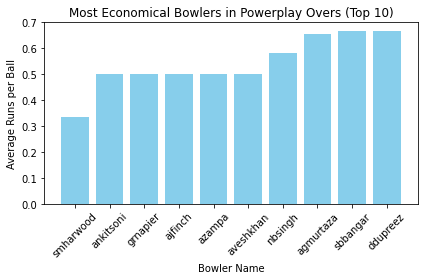

In [0]:
# convert the sql table back to dataframe to plot

economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
#basic plotting: economical_bowlers_pd.plot(kind="bar",figsize=(12,6))

#creating a plot for top 10 bowlers with aveg runs per ball
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



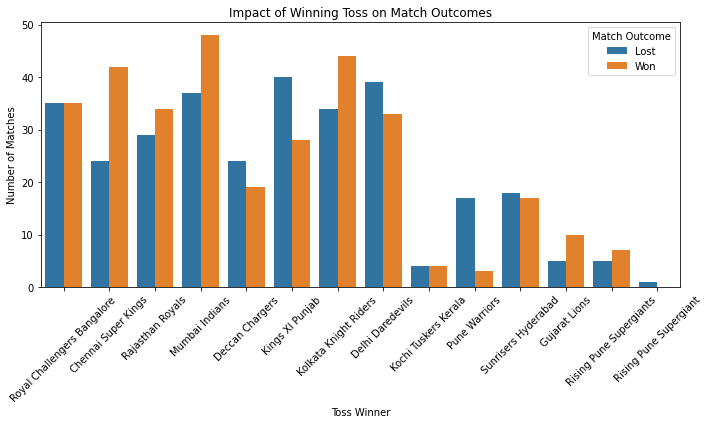

In [0]:
import seaborn as sns

toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
